In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\lokes\Desktop\unternehmer tum project\monatszahlen2510_verkehrsunfaelle_30_10_25.csv')

In [3]:
data.head(10)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2025,202501,NaN,24.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2025,202502,NaN,28.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2025,202503,NaN,25.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2025,202504,NaN,38.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2025,202505,NaN,32.0,NaN,NaN,NaN
5,Alkoholunfälle,insgesamt,2025,202506,NaN,55.0,NaN,NaN,NaN
6,Alkoholunfälle,insgesamt,2025,202507,NaN,45.0,NaN,NaN,NaN
7,Alkoholunfälle,insgesamt,2025,202508,NaN,47.0,NaN,NaN,NaN
8,Alkoholunfälle,insgesamt,2025,202509,NaN,46.0,NaN,NaN,NaN
9,Alkoholunfälle,insgesamt,2025,202510,NaN,37.0,NaN,NaN,NaN


In [4]:
data.shape


(2352, 9)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      2352 non-null   object 
 1   AUSPRAEGUNG                     2352 non-null   object 
 2   JAHR                            2352 non-null   int64  
 3   MONAT                           2352 non-null   object 
 4   WERT                            2268 non-null   float64
 5   VORJAHRESWERT                   2268 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        2092 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  2183 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        2100 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 165.5+ KB


In [6]:
data.isnull().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
JAHR                                0
MONAT                               0
WERT                               84
VORJAHRESWERT                      84
VERAEND_VORMONAT_PROZENT          260
VERAEND_VORJAHRESMONAT_PROZENT    169
ZWOELF_MONATE_MITTELWERT          252
dtype: int64

In [7]:
data.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')

MONATSZAHL
Verkehrsunfälle    1008
Alkoholunfälle      672
Fluchtunfälle       672
Name: count, dtype: int64


<Axes: xlabel='MONATSZAHL'>

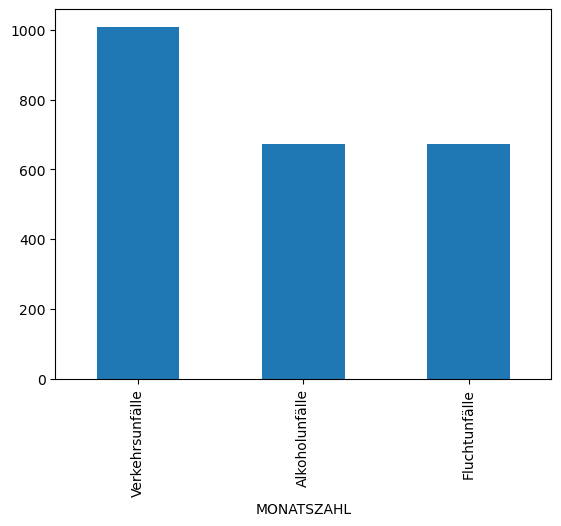

In [8]:
print(data['MONATSZAHL'].value_counts())
data['MONATSZAHL'].value_counts().plot(kind='bar')


In [9]:
# Check unique categories
print("Unique accident categories:")
print(data['MONATSZAHL'].unique())
print("\nUnique types:")
print(data['AUSPRAEGUNG'].unique())

Unique accident categories:
['Alkoholunfälle' 'Fluchtunfälle' 'Verkehrsunfälle']

Unique types:
['insgesamt' 'Verletzte und Getötete' 'mit Personenschäden']


In [10]:
# Filter for Alkoholunfälle (alcohol-related accidents) and 'insgesamt' (total)
df_filtered = data[
    (data['MONATSZAHL'].str.contains('Alkohol', case=False, na=False)) & 
    (data['AUSPRAEGUNG'] == 'insgesamt')
].copy()

# Remove summary rows
df_filtered = df_filtered[df_filtered['MONAT'] != 'Summe'].copy()

# Keep only data up to 2020 (as per challenge instructions)
df_filtered = df_filtered[df_filtered['JAHR'] <= 2020].copy()

# Extract month number from MONAT column (format: YYYYMM)
df_filtered['MONAT_NUM'] = df_filtered['MONAT'].astype(str).str[-2:].astype(int)

# Drop rows with missing WERTs
df_filtered = df_filtered.dropna(subset=['WERT'])

# Sort by year and month
df_filtered = df_filtered.sort_values(['JAHR', 'MONAT_NUM']).reset_index(drop=True)

print(f"Filtered data shape: {df_filtered.shape}")
print(f"Date range: {df_filtered['JAHR'].min()} to {df_filtered['JAHR'].max()}")
print(f"Total months: {len(df_filtered)}")

Filtered data shape: (252, 10)
Date range: 2000 to 2020
Total months: 252


In [11]:
df_filtered.isnull().sum()

MONATSZAHL                         0
AUSPRAEGUNG                        0
JAHR                               0
MONAT                              0
WERT                               0
VORJAHRESWERT                     12
VERAEND_VORMONAT_PROZENT           1
VERAEND_VORJAHRESMONAT_PROZENT    12
ZWOELF_MONATE_MITTELWERT           0
MONAT_NUM                          0
dtype: int64

In [12]:
df_filtered[['JAHR', 'MONAT_NUM', 'WERT']].head(40)

,JAHR,MONAT_NUM,WERT
0,2000,1,78.0
1,2000,2,53.0
2,2000,3,73.0
3,2000,4,78.0
4,2000,5,96.0
5,2000,6,57.0
6,2000,7,99.0
7,2000,8,77.0
8,2000,9,84.0
9,2000,10,83.0


In [13]:
# Basic statistics
print("Statistical Summary:")
print("="*50)
print(f"Mean accidents per month: {df_filtered['WERT'].mean():.2f}")
print(f"Median accidents per month: {df_filtered['WERT'].median():.2f}")
print(f"Std deviation: {df_filtered['WERT'].std():.2f}")
print(f"Min accidents: {df_filtered['WERT'].min():.0f}")
print(f"Max accidents: {df_filtered['WERT'].max():.0f}")
print(f"\nTotal accidents (2000-2020): {df_filtered['WERT'].sum():.0f}")

Statistical Summary:
Mean accidents per month: 43.75
Median accidents per month: 40.00
Std deviation: 18.07
Min accidents: 10
Max accidents: 107

Total accidents (2000-2020): 11026


In [14]:
# Yearly statistics
yearly_stats = df_filtered.groupby('JAHR')['WERT'].agg(['count', 'sum', 'mean', 'std']).round(2)
yearly_stats.columns = ['Months', 'Total', 'Average', 'Std Dev']
print("\nYearly Statistics:")
yearly_stats


Yearly Statistics:


,Months,Total,Average,Std Dev
JAHR,,,,
2000,12,934.0,77.83,13.54
2001,12,848.0,70.67,14.37
2002,12,803.0,66.92,18.41
2003,12,730.0,60.83,12.39
2004,12,659.0,54.92,12.04
2005,12,600.0,50.00,11.28
2006,12,599.0,49.92,7.83
2007,12,560.0,46.67,11.15
2008,12,482.0,40.17,11.65


In [15]:
# Monthly seasonality
monthly_stats = df_filtered.groupby('MONAT_NUM')['WERT'].agg(['mean', 'std']).round(2)
monthly_stats.columns = ['Average', 'Std Dev']
monthly_stats.index.name = 'Month'
print("\nMonthly Seasonality (Average across all years):")
monthly_stats


Monthly Seasonality (Average across all years):


,Average,Std Dev
Month,,
1,33.57,17.00
2,32.00,13.15
3,36.19,15.54
4,39.95,14.96
5,49.81,18.13
6,47.62,14.86
7,57.05,16.28
8,46.71,13.47
9,57.67,21.55


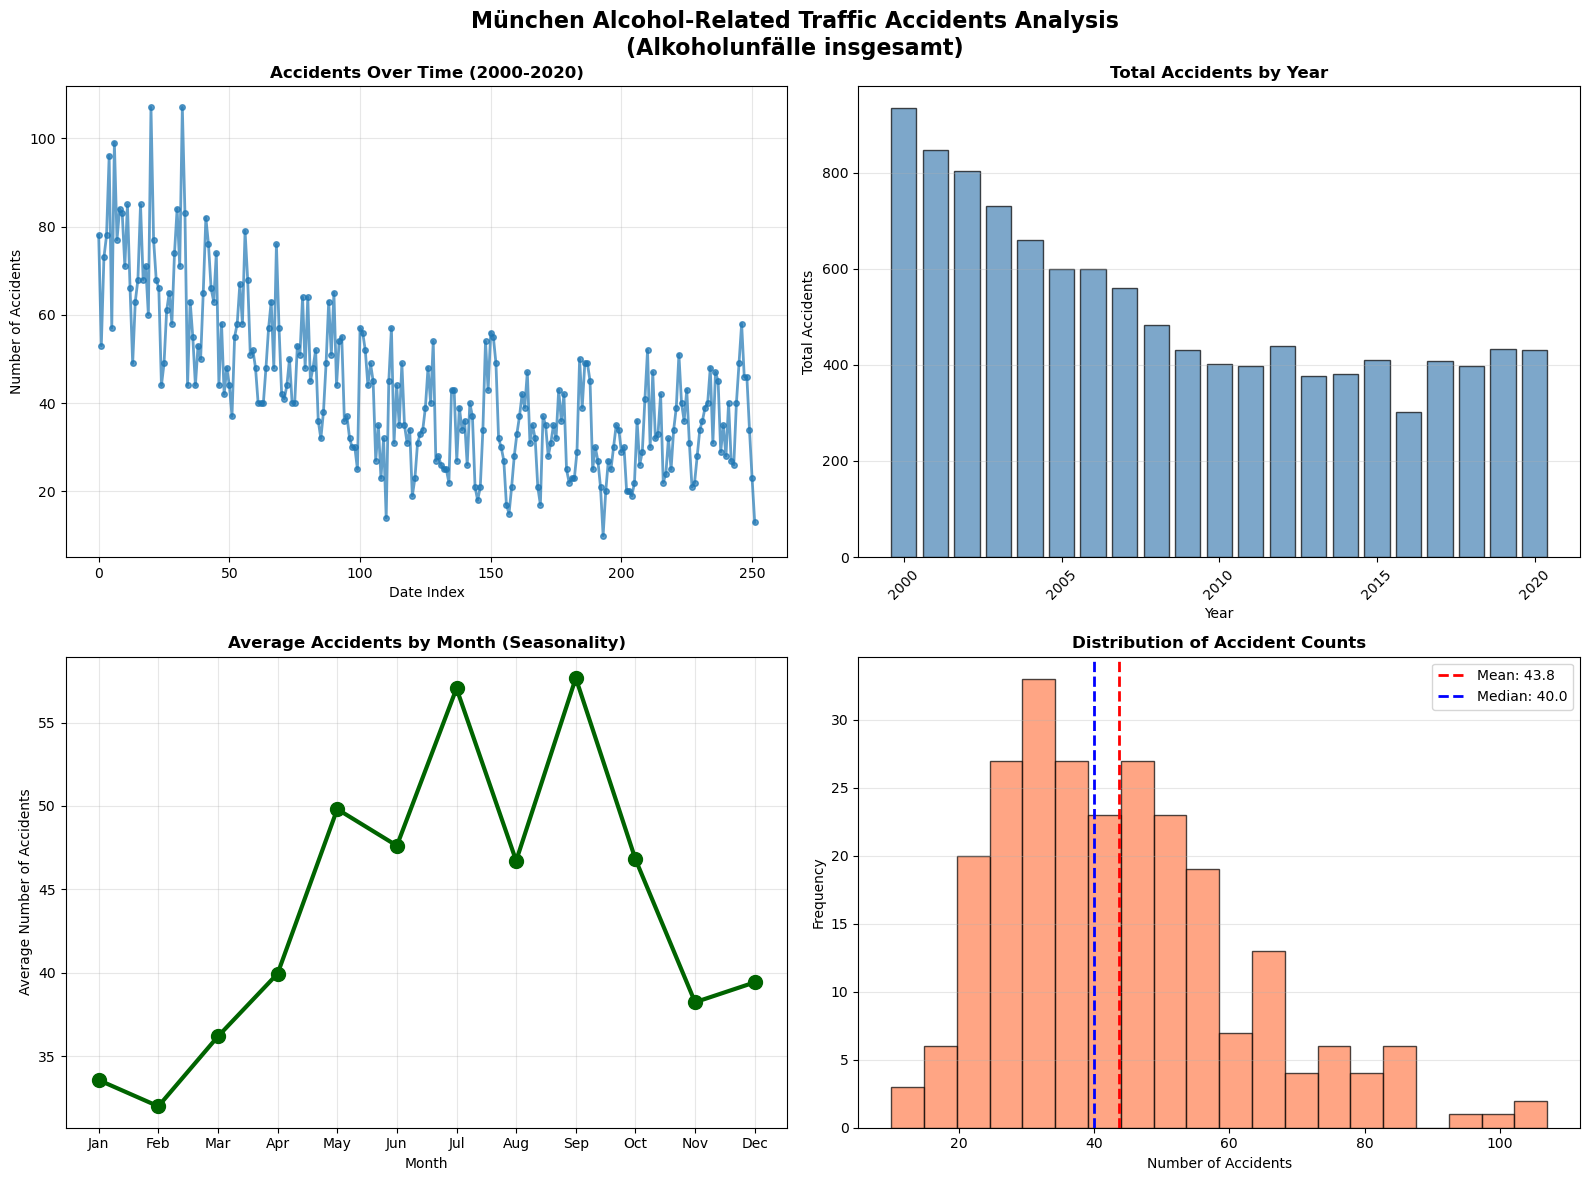

In [16]:
#  visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('München Alcohol-Related Traffic Accidents Analysis\n(Alkoholunfälle insgesamt)', 
             fontsize=16, fontweight='bold')

# Plot 1: Time series
ax1 = axes[0, 0]
ax1.plot(df_filtered.index, df_filtered['WERT'], marker='o', linewidth=2, markersize=4, alpha=0.7)
ax1.set_title('Accidents Over Time (2000-2020)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date Index')
ax1.set_ylabel('Number of Accidents')
ax1.grid(True, alpha=0.3)

# Plot 2: By year
ax2 = axes[0, 1]
yearly_data = df_filtered.groupby('JAHR')['WERT'].sum().reset_index()
ax2.bar(yearly_data['JAHR'], yearly_data['WERT'], alpha=0.7, color='steelblue', edgecolor='black')
ax2.set_title('Total Accidents by Year', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Accidents')
ax2.grid(True, alpha=0.3, axis='y')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Seasonality (by month)
ax3 = axes[1, 0]
monthly_avg = df_filtered.groupby('MONAT_NUM')['WERT'].mean().reset_index()
ax3.plot(monthly_avg['MONAT_NUM'], monthly_avg['WERT'], marker='o', 
         linewidth=3, markersize=10, color='darkgreen')
ax3.set_title('Average Accidents by Month (Seasonality)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Month')
ax3.set_ylabel('Average Number of Accidents')
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax3.grid(True, alpha=0.3)

# Plot 4: Distribution
ax4 = axes[1, 1]
ax4.hist(df_filtered['WERT'], bins=20, alpha=0.7, color='coral', edgecolor='black')
ax4.axvline(df_filtered['WERT'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {df_filtered["WERT"].mean():.1f}')
ax4.axvline(df_filtered['WERT'].median(), color='blue', linestyle='--', 
            linewidth=2, label=f'Median: {df_filtered["WERT"].median():.1f}')
ax4.set_title('Distribution of Accident Counts', fontsize=12, fontweight='bold')
ax4.set_xlabel('Number of Accidents')
ax4.set_ylabel('Frequency')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('historical_accidents_visualization.png', dpi=300, bbox_inches='tight')
plt.show()


In [17]:
# Create features for machine learning
df_features = df_filtered.copy()

# Basic features
df_features['year'] = df_features['JAHR']
df_features['month'] = df_features['MONAT_NUM']

# Cyclical features for month (sine and cosine to capture seasonality)
df_features['month_sin'] = np.sin(2 * np.pi * df_features['month'] / 12)
df_features['month_cos'] = np.cos(2 * np.pi * df_features['month'] / 12)

# Time index
df_features['time_idx'] = (df_features['year'] - df_features['year'].min()) * 12 + df_features['month']

# Lag features 
df_features['lag_1'] = df_features['WERT'].shift(1)
df_features['lag_2'] = df_features['WERT'].shift(2)
df_features['lag_3'] = df_features['WERT'].shift(3)
df_features['lag_12'] = df_features['WERT'].shift(12)  

# Rolling statistics
df_features['rolling_mean_3'] = df_features['WERT'].rolling(window=3, min_periods=1).mean().shift(1)
df_features['rolling_mean_6'] = df_features['WERT'].rolling(window=6, min_periods=1).mean().shift(1)
df_features['rolling_std_3'] = df_features['WERT'].rolling(window=3, min_periods=1).std().shift(1)

# Drop rows with NaN values created by lag features
df_features = df_features.dropna()

print(f"Features created. Shape: {df_features.shape}")
print(f"\nFeature columns: {df_features.columns.tolist()}")



Features created. Shape: (240, 22)

Feature columns: ['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT', 'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT', 'ZWOELF_MONATE_MITTELWERT', 'MONAT_NUM', 'year', 'month', 'month_sin', 'month_cos', 'time_idx', 'lag_1', 'lag_2', 'lag_3', 'lag_12', 'rolling_mean_3', 'rolling_mean_6', 'rolling_std_3']


In [18]:
df_features[['year', 'month', 'month_sin', 'month_cos', 'time_idx',
                'lag_1', 'lag_2', 'lag_3', 'lag_12',
                'rolling_mean_3', 'rolling_mean_6', 'rolling_std_3']].head(15)

,year,month,month_sin,month_cos,time_idx,lag_1,lag_2,lag_3,lag_12,rolling_mean_3,rolling_mean_6,rolling_std_3
12,2001,1,5.000000e-01,8.660254e-01,13,85.0,71.0,83.0,78.0,79.666667,83.166667,7.571878
13,2001,2,8.660254e-01,5.000000e-01,14,66.0,85.0,71.0,53.0,74.000000,77.666667,9.848858
14,2001,3,1.000000e+00,6.123234e-17,15,49.0,66.0,85.0,73.0,66.666667,73.000000,18.009257
15,2001,4,8.660254e-01,-5.000000e-01,16,63.0,49.0,66.0,78.0,59.333333,69.500000,9.073772
16,2001,5,5.000000e-01,-8.660254e-01,17,68.0,63.0,49.0,96.0,60.000000,67.000000,9.848858
17,2001,6,1.224647e-16,-1.000000e+00,18,85.0,68.0,63.0,57.0,72.000000,69.333333,11.532563
18,2001,7,-5.000000e-01,-8.660254e-01,19,68.0,85.0,68.0,99.0,73.666667,66.500000,9.814955
19,2001,8,-8.660254e-01,-5.000000e-01,20,71.0,68.0,85.0,77.0,74.666667,67.333333,9.073772
20,2001,9,-1.000000e+00,-1.836970e-16,21,60.0,71.0,68.0,84.0,66.333333,69.166667,5.686241
21,2001,10,-8.660254e-01,5.000000e-01,22,107.0,60.0,71.0,83.0,79.333333,76.500000,24.583192


In [19]:
# Define features and target
feature_cols = ['year', 'month', 'month_sin', 'month_cos', 'time_idx',
                'lag_1', 'lag_2', 'lag_3', 'lag_12',
                'rolling_mean_3', 'rolling_mean_6', 'rolling_std_3']

X = df_features[feature_cols]
y = df_features['WERT']  # Using WERT directly

# Split data: train on all data up to 2019, test on 2020
train_mask = df_features['year'] < 2020
test_mask = df_features['year'] == 2020

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")
print(f"\nTraining period: {df_features[train_mask]['year'].min()}-{df_features[train_mask]['year'].max()}")
print(f"Test period: {df_features[test_mask]['year'].min()}-{df_features[test_mask]['year'].max()}")

Training set size: 228 samples
Test set size: 12 samples

Training period: 2001-2019
Test period: 2020-2020


In [20]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("=" * 80)
print("TRAINING: RANDOM FOREST REGRESSOR")
print("=" * 80)

# Initialize model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Train model
print("\nTraining Random Forest...")
rf_model.fit(X_train_scaled, y_train)
print(" Training complete")

# Make predictions
rf_train_pred = rf_model.predict(X_train_scaled)
rf_test_pred = rf_model.predict(X_test_scaled)

# Calculate metrics
rf_train_mae = mean_absolute_error(y_train, rf_train_pred)
rf_test_mae = mean_absolute_error(y_test, rf_test_pred)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

# Display results
print("\n" + "=" * 80)
print("RANDOM FOREST RESULTS")
print("=" * 80)
print(f"Training Set:")
print(f"  MAE:  {rf_train_mae:.4f}")
print(f"  RMSE: {rf_train_rmse:.4f}")
print(f"  R²:   {rf_train_r2:.4f}")
print(f"\nTest Set:")
print(f"  MAE:  {rf_test_mae:.4f}")
print(f"  RMSE: {rf_test_rmse:.4f}")
print(f"  R²:   {rf_test_r2:.4f}")

# Feature importance (top 5)
print("\n" + "=" * 80)
print("TOP 5 FEATURE IMPORTANCES")
print("=" * 80)
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(5).to_string(index=False))

# Store results for comparison
rf_results = {
    'model_name': 'Random Forest',
    'model': rf_model,
    'train_pred': rf_train_pred,
    'test_pred': rf_test_pred,
    'train_mae': rf_train_mae,
    'test_mae': rf_test_mae,
    'train_rmse': rf_train_rmse,
    'test_rmse': rf_test_rmse,
    'train_r2': rf_train_r2,
    'test_r2': rf_test_r2
}

print("\Random Forest results stored in 'rf_results' dictionary")
print("=" * 80)

TRAINING: RANDOM FOREST REGRESSOR

Training Random Forest...
 Training complete

RANDOM FOREST RESULTS
Training Set:
  MAE:  3.1647
  RMSE: 4.2810
  R²:   0.9337

Test Set:
  MAE:  8.4857
  RMSE: 9.4837
  R²:   0.4108

TOP 5 FEATURE IMPORTANCES
      Feature  Importance
       lag_12    0.664681
        lag_1    0.084745
     time_idx    0.047526
rolling_std_3    0.035269
        month    0.034156
\Random Forest results stored in 'rf_results' dictionary


In [22]:
# Hyperparameter Tuning - Random Forest Regressor
from sklearn.model_selection import GridSearchCV

print("=" * 80)
print("HYPERPARAMETER TUNING: RANDOM FOREST REGRESSOR")
print("=" * 80)

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize base model
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

# Grid Search with Cross-Validation
print("\nStarting Grid Search")
print(f"Testing {len(param_grid_rf['n_estimators']) * len(param_grid_rf['max_depth']) * len(param_grid_rf['min_samples_split']) * len(param_grid_rf['min_samples_leaf']) * len(param_grid_rf['max_features'])} combinations...")

grid_search_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_scaled, y_train)

print("\n Grid Search complete")

# Best parameters
print("\n" + "=" * 80)
print("BEST HYPERPARAMETERS")
print("=" * 80)
print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best CV MAE: {-grid_search_rf.best_score_:.4f}")

# Train final tuned model
rf_tuned_model = grid_search_rf.best_estimator_

# Make predictions
rf_tuned_train_pred = rf_tuned_model.predict(X_train_scaled)
rf_tuned_test_pred = rf_tuned_model.predict(X_test_scaled)

# Calculate metrics
rf_tuned_train_mae = mean_absolute_error(y_train, rf_tuned_train_pred)
rf_tuned_test_mae = mean_absolute_error(y_test, rf_tuned_test_pred)
rf_tuned_train_rmse = np.sqrt(mean_squared_error(y_train, rf_tuned_train_pred))
rf_tuned_test_rmse = np.sqrt(mean_squared_error(y_test, rf_tuned_test_pred))
rf_tuned_train_r2 = r2_score(y_train, rf_tuned_train_pred)
rf_tuned_test_r2 = r2_score(y_test, rf_tuned_test_pred)

# Display results
print("\n" + "=" * 80)
print("TUNED RANDOM FOREST RESULTS")
print("=" * 80)
print(f"Training Set:")
print(f"  MAE:  {rf_tuned_train_mae:.4f}")
print(f"  RMSE: {rf_tuned_train_rmse:.4f}")
print(f"  R²:   {rf_tuned_train_r2:.4f}")
print(f"\nTest Set:")
print(f"  MAE:  {rf_tuned_test_mae:.4f}")
print(f"  RMSE: {rf_tuned_test_rmse:.4f}")
print(f"  R²:   {rf_tuned_test_r2:.4f}")

# Comparison with baseline
print("\n" + "=" * 80)
print("IMPROVEMENT OVER BASELINE")
print("=" * 80)
print(f"Test MAE - Baseline: {rf_test_mae:.4f}")
print(f"Test MAE - Tuned:    {rf_tuned_test_mae:.4f}")
print(f"Improvement:         {rf_test_mae - rf_tuned_test_mae:.4f} ({((rf_test_mae - rf_tuned_test_mae)/rf_test_mae)*100:.2f}%)")

# Store tuned results
rf_tuned_results = {
    'model_name': 'Random Forest (Tuned)',
    'model': rf_tuned_model,
    'train_pred': rf_tuned_train_pred,
    'test_pred': rf_tuned_test_pred,
    'train_mae': rf_tuned_train_mae,
    'test_mae': rf_tuned_test_mae,
    'train_rmse': rf_tuned_train_rmse,
    'test_rmse': rf_tuned_test_rmse,
    'train_r2': rf_tuned_train_r2,
    'test_r2': rf_tuned_test_r2,
    'best_params': grid_search_rf.best_params_
}

print("\n Tuned Random Forest results stored in 'rf_tuned_results' dictionary")
print("=" * 80)

HYPERPARAMETER TUNING: RANDOM FOREST REGRESSOR

Starting Grid Search
Testing 216 combinations...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

 Grid Search complete

BEST HYPERPARAMETERS
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV MAE: 7.5951

TUNED RANDOM FOREST RESULTS
Training Set:
  MAE:  3.2453
  RMSE: 4.3349
  R²:   0.9320

Test Set:
  MAE:  7.7507
  RMSE: 9.4916
  R²:   0.4098

IMPROVEMENT OVER BASELINE
Test MAE - Baseline: 8.4857
Test MAE - Tuned:    7.7507
Improvement:         0.7350 (8.66%)

 Tuned Random Forest results stored in 'rf_tuned_results' dictionary


In [23]:
# Train XGBoost Regressor
from xgboost import XGBRegressor

print("=" * 80)
print("TRAINING: XGBOOST REGRESSOR")
print("=" * 80)

# Initialize model
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Train model
print("\nTraining XGBoost...")
xgb_model.fit(X_train_scaled, y_train)
print(" Training complete")

# Make predictions
xgb_train_pred = xgb_model.predict(X_train_scaled)
xgb_test_pred = xgb_model.predict(X_test_scaled)

# Calculate metrics
xgb_train_mae = mean_absolute_error(y_train, xgb_train_pred)
xgb_test_mae = mean_absolute_error(y_test, xgb_test_pred)
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
xgb_train_r2 = r2_score(y_train, xgb_train_pred)
xgb_test_r2 = r2_score(y_test, xgb_test_pred)

# Display results
print("\n" + "=" * 80)
print("XGBOOST RESULTS")
print("=" * 80)
print(f"Training Set:")
print(f"  MAE:  {xgb_train_mae:.4f}")
print(f"  RMSE: {xgb_train_rmse:.4f}")
print(f"  R²:   {xgb_train_r2:.4f}")
print(f"\nTest Set:")
print(f"  MAE:  {xgb_test_mae:.4f}")
print(f"  RMSE: {xgb_test_rmse:.4f}")
print(f"  R²:   {xgb_test_r2:.4f}")

# Feature importance (top 5)
print("\n" + "=" * 80)
print("TOP 5 FEATURE IMPORTANCES")
print("=" * 80)
feature_importance_xgb = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_xgb.head(5).to_string(index=False))

# Store results for comparison
xgb_results = {
    'model_name': 'XGBoost',
    'model': xgb_model,
    'train_pred': xgb_train_pred,
    'test_pred': xgb_test_pred,
    'train_mae': xgb_train_mae,
    'test_mae': xgb_test_mae,
    'train_rmse': xgb_train_rmse,
    'test_rmse': xgb_test_rmse,
    'train_r2': xgb_train_r2,
    'test_r2': xgb_test_r2
}

print("\n XGBoost results stored in 'xgb_results' dictionary")
print("=" * 80)

TRAINING: XGBOOST REGRESSOR

Training XGBoost...
 Training complete

XGBOOST RESULTS
Training Set:
  MAE:  0.3233
  RMSE: 0.4370
  R²:   0.9993

Test Set:
  MAE:  7.7527
  RMSE: 9.4959
  R²:   0.4092

TOP 5 FEATURE IMPORTANCES
  Feature  Importance
   lag_12    0.457178
 time_idx    0.096674
month_cos    0.090865
    month    0.060782
     year    0.057085

 XGBoost results stored in 'xgb_results' dictionary


In [24]:
# Hyperparameter Tuning - XGBoost Regressor
from sklearn.model_selection import GridSearchCV

print("=" * 80)
print("HYPERPARAMETER TUNING: XGBOOST REGRESSOR")
print("=" * 80)

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize base model
xgb_base = XGBRegressor(random_state=42, n_jobs=-1)

# Grid Search with Cross-Validation
print("\nStarting Grid Search ")
print(f"Testing {len(param_grid_xgb['n_estimators']) * len(param_grid_xgb['max_depth']) * len(param_grid_xgb['learning_rate']) * len(param_grid_xgb['subsample']) * len(param_grid_xgb['colsample_bytree'])} combinations...")

grid_search_xgb = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train_scaled, y_train)

print("\n✓ Grid Search complete")

# Best parameters
print("\n" + "=" * 80)
print("BEST HYPERPARAMETERS")
print("=" * 80)
print(f"Best parameters: {grid_search_xgb.best_params_}")
print(f"Best CV MAE: {-grid_search_xgb.best_score_:.4f}")

# Train final tuned model
xgb_tuned_model = grid_search_xgb.best_estimator_

# Make predictions
xgb_tuned_train_pred = xgb_tuned_model.predict(X_train_scaled)
xgb_tuned_test_pred = xgb_tuned_model.predict(X_test_scaled)

# Calculate metrics
xgb_tuned_train_mae = mean_absolute_error(y_train, xgb_tuned_train_pred)
xgb_tuned_test_mae = mean_absolute_error(y_test, xgb_tuned_test_pred)
xgb_tuned_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_tuned_train_pred))
xgb_tuned_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_tuned_test_pred))
xgb_tuned_train_r2 = r2_score(y_train, xgb_tuned_train_pred)
xgb_tuned_test_r2 = r2_score(y_test, xgb_tuned_test_pred)

# Display results
print("\n" + "=" * 80)
print("TUNED XGBOOST RESULTS")
print("=" * 80)
print(f"Training Set:")
print(f"  MAE:  {xgb_tuned_train_mae:.4f}")
print(f"  RMSE: {xgb_tuned_train_rmse:.4f}")
print(f"  R²:   {xgb_tuned_train_r2:.4f}")
print(f"\nTest Set:")
print(f"  MAE:  {xgb_tuned_test_mae:.4f}")
print(f"  RMSE: {xgb_tuned_test_rmse:.4f}")
print(f"  R²:   {xgb_tuned_test_r2:.4f}")

# Comparison with baseline
print("\n" + "=" * 80)
print("IMPROVEMENT OVER BASELINE")
print("=" * 80)
print(f"Test MAE - Baseline: {xgb_test_mae:.4f}")
print(f"Test MAE - Tuned:    {xgb_tuned_test_mae:.4f}")
print(f"Improvement:         {xgb_test_mae - xgb_tuned_test_mae:.4f} ({((xgb_test_mae - xgb_tuned_test_mae)/xgb_test_mae)*100:.2f}%)")

# Store tuned results
xgb_tuned_results = {
    'model_name': 'XGBoost (Tuned)',
    'model': xgb_tuned_model,
    'train_pred': xgb_tuned_train_pred,
    'test_pred': xgb_tuned_test_pred,
    'train_mae': xgb_tuned_train_mae,
    'test_mae': xgb_tuned_test_mae,
    'train_rmse': xgb_tuned_train_rmse,
    'test_rmse': xgb_tuned_test_rmse,
    'train_r2': xgb_tuned_train_r2,
    'test_r2': xgb_tuned_test_r2,
    'best_params': grid_search_xgb.best_params_
}

print("\nTuned XGBoost results stored in 'xgb_tuned_results' dictionary")
print("=" * 80)

HYPERPARAMETER TUNING: XGBOOST REGRESSOR

Starting Grid Search 
Testing 432 combinations...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

✓ Grid Search complete

BEST HYPERPARAMETERS
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best CV MAE: 7.1758

TUNED XGBOOST RESULTS
Training Set:
  MAE:  2.8031
  RMSE: 3.5718
  R²:   0.9538

Test Set:
  MAE:  6.9200
  RMSE: 8.7190
  R²:   0.5020

IMPROVEMENT OVER BASELINE
Test MAE - Baseline: 7.7527
Test MAE - Tuned:    6.9200
Improvement:         0.8327 (10.74%)

Tuned XGBoost results stored in 'xgb_tuned_results' dictionary


In [25]:
# Train Prophet Model
import numpy as np
np.float_ = np.float64  

from prophet import Prophet


print("=" * 80)
print("TRAINING: PROPHET MODEL")
print("=" * 80)

# Prepare data for Prophet (needs 'ds' and 'y' columns)
prophet_train = df_features[train_mask][['JAHR', 'MONAT_NUM', 'WERT']].copy()
prophet_train['ds'] = pd.to_datetime(
    prophet_train['JAHR'].astype(str) + '-' + 
    prophet_train['MONAT_NUM'].astype(str).str.zfill(2) + '-01'
)
prophet_train['y'] = prophet_train['WERT']
prophet_train = prophet_train[['ds', 'y']]

prophet_test = df_features[test_mask][['JAHR', 'MONAT_NUM', 'WERT']].copy()
prophet_test['ds'] = pd.to_datetime(
    prophet_test['JAHR'].astype(str) + '-' + 
    prophet_test['MONAT_NUM'].astype(str).str.zfill(2) + '-01'
)
prophet_test['y'] = prophet_test['WERT']

# Initialize and train Prophet
print("\nTraining Prophet...")
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

prophet_model.fit(prophet_train)
print("✓ Training complete")

# Make predictions
prophet_train_forecast = prophet_model.predict(prophet_train[['ds']])
prophet_test_forecast = prophet_model.predict(prophet_test[['ds']])

prophet_train_pred = prophet_train_forecast['yhat'].values
prophet_test_pred = prophet_test_forecast['yhat'].values

# Calculate metrics
prophet_train_mae = mean_absolute_error(prophet_train['y'], prophet_train_pred)
prophet_test_mae = mean_absolute_error(prophet_test['y'], prophet_test_pred)
prophet_train_rmse = np.sqrt(mean_squared_error(prophet_train['y'], prophet_train_pred))
prophet_test_rmse = np.sqrt(mean_squared_error(prophet_test['y'], prophet_test_pred))
prophet_train_r2 = r2_score(prophet_train['y'], prophet_train_pred)
prophet_test_r2 = r2_score(prophet_test['y'], prophet_test_pred)

# Display results
print("\n" + "=" * 80)
print("PROPHET RESULTS")
print("=" * 80)
print(f"Training Set:")
print(f"  MAE:  {prophet_train_mae:.4f}")
print(f"  RMSE: {prophet_train_rmse:.4f}")
print(f"  R²:   {prophet_train_r2:.4f}")
print(f"\nTest Set:")
print(f"  MAE:  {prophet_test_mae:.4f}")
print(f"  RMSE: {prophet_test_rmse:.4f}")
print(f"  R²:   {prophet_test_r2:.4f}")

# Store results for comparison
prophet_results = {
    'model_name': 'Prophet',
    'model': prophet_model,
    'train_pred': prophet_train_pred,
    'test_pred': prophet_test_pred,
    'train_mae': prophet_train_mae,
    'test_mae': prophet_test_mae,
    'train_rmse': prophet_train_rmse,
    'test_rmse': prophet_test_rmse,
    'train_r2': prophet_train_r2,
    'test_r2': prophet_test_r2
}

print("\n Prophet results stored in 'prophet_results' dictionary")
print("=" * 80)

TRAINING: PROPHET MODEL


c:\anaconda\envs\ironhack\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
16:32:50 - cmdstanpy - INFO - Chain [1] start processing



Training Prophet...


16:32:50 - cmdstanpy - INFO - Chain [1] done processing


✓ Training complete

PROPHET RESULTS
Training Set:
  MAE:  5.7089
  RMSE: 7.1588
  R²:   0.8145

Test Set:
  MAE:  8.0478
  RMSE: 10.2910
  R²:   0.3062

 Prophet results stored in 'prophet_results' dictionary


In [26]:
# Train Neural Network (Deep Learning)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

print("=" * 80)
print("TRAINING: NEURAL NETWORK (DEEP LEARNING)")
print("=" * 80)

# Set random seed for reproducibility
tf.random.set_seed(42)

# Build Neural Network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile model
nn_model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

print("\nModel Architecture:")
nn_model.summary()

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# Train model
print("\nTraining Neural Network...")
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=16,
    callbacks=[early_stop],
    verbose=0
)

print("✓ Training complete")
print(f"Stopped at epoch: {len(history.history['loss'])}")

# Make predictions
nn_train_pred = nn_model.predict(X_train_scaled, verbose=0).flatten()
nn_test_pred = nn_model.predict(X_test_scaled, verbose=0).flatten()

# Calculate metrics
nn_train_mae = mean_absolute_error(y_train, nn_train_pred)
nn_test_mae = mean_absolute_error(y_test, nn_test_pred)
nn_train_rmse = np.sqrt(mean_squared_error(y_train, nn_train_pred))
nn_test_rmse = np.sqrt(mean_squared_error(y_test, nn_test_pred))
nn_train_r2 = r2_score(y_train, nn_train_pred)
nn_test_r2 = r2_score(y_test, nn_test_pred)

# Display results
print("\n" + "=" * 80)
print("NEURAL NETWORK RESULTS")
print("=" * 80)
print(f"Training Set:")
print(f"  MAE:  {nn_train_mae:.4f}")
print(f"  RMSE: {nn_train_rmse:.4f}")
print(f"  R²:   {nn_train_r2:.4f}")
print(f"\nTest Set:")
print(f"  MAE:  {nn_test_mae:.4f}")
print(f"  RMSE: {nn_test_rmse:.4f}")
print(f"  R²:   {nn_test_r2:.4f}")

# Store results for comparison
nn_results = {
    'model_name': 'Neural Network',
    'model': nn_model,
    'train_pred': nn_train_pred,
    'test_pred': nn_test_pred,
    'train_mae': nn_train_mae,
    'test_mae': nn_test_mae,
    'train_rmse': nn_train_rmse,
    'test_rmse': nn_test_rmse,
    'train_r2': nn_train_r2,
    'test_r2': nn_test_r2,
    'history': history
}

print("\n✓ Neural Network results stored in 'nn_results' dictionary")
print("=" * 80)

c:\anaconda\envs\ironhack\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


TRAINING: NEURAL NETWORK (DEEP LEARNING)

Model Architecture:


c:\anaconda\envs\ironhack\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)


Training Neural Network...
✓ Training complete
Stopped at epoch: 110

NEURAL NETWORK RESULTS
Training Set:
  MAE:  5.8059
  RMSE: 7.4093
  R²:   0.8013

Test Set:
  MAE:  7.9996
  RMSE: 10.1948
  R²:   0.3191

✓ Neural Network results stored in 'nn_results' dictionary


COMPREHENSIVE MODEL COMPARISON

MODEL PERFORMANCE SUMMARY (Sorted by Test MAE)
                Model  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R²  Test R²
      XGBoost (Tuned)   2.803110  6.920017    3.571786   8.718981  0.953817 0.501958
Random Forest (Tuned)   3.245299  7.750689    4.334866   9.491554  0.931977 0.409786
              XGBoost   0.323323  7.752687    0.437047   9.495949  0.999309 0.409239
       Neural Network   5.805902  7.999617    7.409315  10.194824  0.801270 0.319083
              Prophet   5.708919  8.047789    7.158792  10.291008  0.814482 0.306174
        Random Forest   3.164720  8.485663    4.280993   9.483664  0.933657 0.410767

 BEST MODEL: XGBoost (Tuned)
   Test MAE: 6.9200


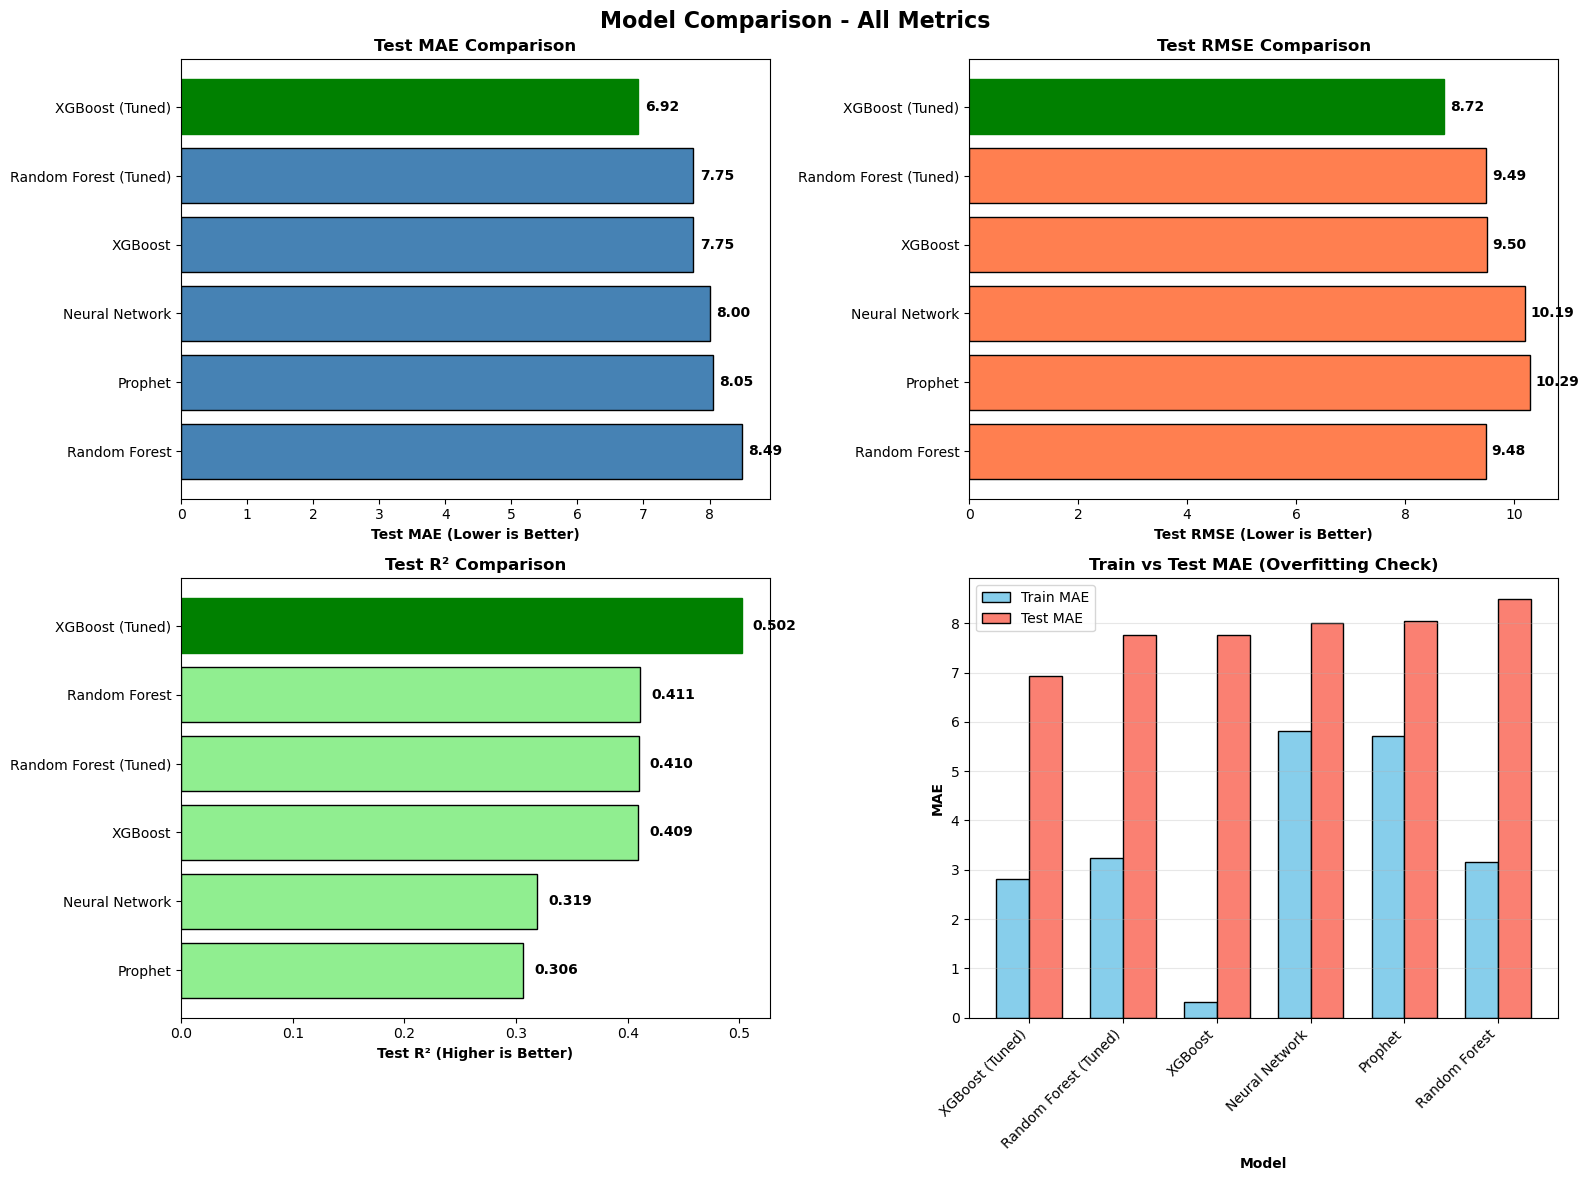


 Comparison visualization saved as 'model_comparison_all.png'


In [27]:
# Model Comparison - All Models
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 80)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 80)

# Collect all results
all_results = [
    rf_results,
    rf_tuned_results,
    xgb_results,
    xgb_tuned_results,
    prophet_results,
    nn_results
]

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': [r['model_name'] for r in all_results],
    'Train MAE': [r['train_mae'] for r in all_results],
    'Test MAE': [r['test_mae'] for r in all_results],
    'Train RMSE': [r['train_rmse'] for r in all_results],
    'Test RMSE': [r['test_rmse'] for r in all_results],
    'Train R²': [r['train_r2'] for r in all_results],
    'Test R²': [r['test_r2'] for r in all_results]
})

# Sort by Test MAE (best performance)
comparison_df = comparison_df.sort_values('Test MAE')

print("\n" + "=" * 80)
print("MODEL PERFORMANCE SUMMARY (Sorted by Test MAE)")
print("=" * 80)
print(comparison_df.to_string(index=False))

# Find best model
best_model_idx = comparison_df['Test MAE'].idxmin()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_test_mae = comparison_df.loc[best_model_idx, 'Test MAE']

print("\n" + "=" * 80)
print(f" BEST MODEL: {best_model_name}")
print(f"   Test MAE: {best_test_mae:.4f}")
print("=" * 80)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Comparison - All Metrics', fontsize=16, fontweight='bold')

# Plot 1: Test MAE Comparison
ax1 = axes[0, 0]
bars1 = ax1.barh(comparison_df['Model'], comparison_df['Test MAE'], color='steelblue', edgecolor='black')
bars1[0].set_color('green')  # Highlight best model
ax1.set_xlabel('Test MAE (Lower is Better)', fontweight='bold')
ax1.set_title('Test MAE Comparison', fontweight='bold')
ax1.invert_yaxis()
for i, v in enumerate(comparison_df['Test MAE']):
    ax1.text(v + 0.1, i, f'{v:.2f}', va='center', fontweight='bold')

# Plot 2: Test RMSE Comparison
ax2 = axes[0, 1]
bars2 = ax2.barh(comparison_df['Model'], comparison_df['Test RMSE'], color='coral', edgecolor='black')
bars2[0].set_color('green')
ax2.set_xlabel('Test RMSE (Lower is Better)', fontweight='bold')
ax2.set_title('Test RMSE Comparison', fontweight='bold')
ax2.invert_yaxis()
for i, v in enumerate(comparison_df['Test RMSE']):
    ax2.text(v + 0.1, i, f'{v:.2f}', va='center', fontweight='bold')

# Plot 3: Test R² Comparison
ax3 = axes[1, 0]
comparison_sorted_r2 = comparison_df.sort_values('Test R²', ascending=False)
bars3 = ax3.barh(comparison_sorted_r2['Model'], comparison_sorted_r2['Test R²'], color='lightgreen', edgecolor='black')
bars3[0].set_color('green')
ax3.set_xlabel('Test R² (Higher is Better)', fontweight='bold')
ax3.set_title('Test R² Comparison', fontweight='bold')
ax3.invert_yaxis()
for i, v in enumerate(comparison_sorted_r2['Test R²']):
    ax3.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# Plot 4: Train vs Test MAE
ax4 = axes[1, 1]
x = np.arange(len(comparison_df))
width = 0.35
bars_train = ax4.bar(x - width/2, comparison_df['Train MAE'], width, label='Train MAE', color='skyblue', edgecolor='black')
bars_test = ax4.bar(x + width/2, comparison_df['Test MAE'], width, label='Test MAE', color='salmon', edgecolor='black')
ax4.set_xlabel('Model', fontweight='bold')
ax4.set_ylabel('MAE', fontweight='bold')
ax4.set_title('Train vs Test MAE (Overfitting Check)', fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison_all.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Comparison visualization saved as 'model_comparison_all.png'")
print("=" * 80)

In [28]:
# Predict January 2021 with All Models (FIXED)
print("=" * 80)
print("JANUARY 2021 PREDICTIONS - ALL MODELS")
print("=" * 80)

# Get recent data for lag features (last 12 months from training data)
recent_data = df_features[df_features['year'] <= 2020].tail(12).copy()

# Create features for January 2021
jan_2021_features = {
    'year': 2021,
    'month': 1,
    'month_sin': np.sin(2 * np.pi * 1 / 12),
    'month_cos': np.cos(2 * np.pi * 1 / 12),
    'time_idx': (2021 - df_features['year'].min()) * 12 + 1,
    'lag_1': recent_data.iloc[-1]['WERT'],
    'lag_2': recent_data.iloc[-2]['WERT'],
    'lag_3': recent_data.iloc[-3]['WERT'],
    'lag_12': recent_data[recent_data['month'] == 1].iloc[-1]['WERT'],
    'rolling_mean_3': recent_data.tail(4).iloc[:-1]['WERT'].mean(),
    'rolling_mean_6': recent_data.tail(7).iloc[:-1]['WERT'].mean(),
    'rolling_std_3': recent_data.tail(4).iloc[:-1]['WERT'].std()
}

# Create DataFrame
X_jan_2021 = pd.DataFrame([jan_2021_features])[feature_cols]
X_jan_2021_scaled = scaler.transform(X_jan_2021)

print("\nFeatures for January 2021:")
for key, value in jan_2021_features.items():
    print(f"  {key:20s}: {value:.2f}" if isinstance(value, float) else f"  {key:20s}: {value}")

# Make predictions with all models
print("\n" + "=" * 80)
print("PREDICTIONS FOR JANUARY 2021")
print("=" * 80)

predictions = {}

# Random Forest
predictions['Random Forest'] = rf_results['model'].predict(X_jan_2021_scaled)[0]

# Random Forest (Tuned)
predictions['Random Forest (Tuned)'] = rf_tuned_results['model'].predict(X_jan_2021_scaled)[0]

# XGBoost
predictions['XGBoost'] = xgb_results['model'].predict(X_jan_2021_scaled)[0]

# XGBoost (Tuned)
predictions['XGBoost (Tuned)'] = xgb_tuned_results['model'].predict(X_jan_2021_scaled)[0]

# Prophet
jan_2021_prophet = pd.DataFrame({'ds': [pd.to_datetime('2021-01-01')]})
predictions['Prophet'] = prophet_results['model'].predict(jan_2021_prophet)['yhat'].values[0]

# Neural Network
nn_pred = nn_results['model'].predict(X_jan_2021_scaled, verbose=0)
predictions['Neural Network'] = float(nn_pred[0][0])

# Get actual value from ORIGINAL dataframe 'data'
actual_jan_2021_data = data[
    (data['MONATSZAHL'].str.contains('Alkohol', case=False, na=False)) & 
    (data['AUSPRAEGUNG'] == 'insgesamt') &
    (data['JAHR'] == 2021) &
    (data['MONAT'].astype(str).str[-2:] == '01')
]['WERT']

if len(actual_jan_2021_data) > 0 and not pd.isna(actual_jan_2021_data.values[0]):
    actual_jan_2021 = float(actual_jan_2021_data.values[0])
    
    # Display predictions
    print(f"\n{'Model':<25} {'Prediction':>12} {'Rounded':>10} {'Error':>10}")
    print("-" * 60)
    
    for model_name, pred in predictions.items():
        error = abs(pred - actual_jan_2021)
        print(f"{model_name:<25} {pred:>12.2f} {round(pred):>10} {error:>10.2f}")
    
    print("-" * 60)
    print(f"{'ACTUAL VALUE':<25} {actual_jan_2021:>12.0f}")
    print("=" * 80)
    
    # Find best prediction
    best_pred_model = min(predictions.items(), key=lambda x: abs(x[1] - actual_jan_2021))
    print(f"\n CLOSEST PREDICTION: {best_pred_model[0]}")
    print(f"   Predicted: {best_pred_model[1]:.2f} → {round(best_pred_model[1])}")
    print(f"   Actual: {actual_jan_2021:.0f}")
    print(f"   Error: {abs(best_pred_model[1] - actual_jan_2021):.2f}")
    print("=" * 80)
else:
    print("\n⚠ Actual January 2021 data not available in dataset")
    print("\nPredictions without validation:")
    print(f"\n{'Model':<25} {'Prediction':>12} {'Rounded':>10}")
    print("-" * 50)
    for model_name, pred in predictions.items():
        print(f"{model_name:<25} {pred:>12.2f} {round(pred):>10}")
    print("=" * 80)

JANUARY 2021 PREDICTIONS - ALL MODELS

Features for January 2021:
  year                : 2021
  month               : 1
  month_sin           : 0.50
  month_cos           : 0.87
  time_idx            : 241
  lag_1               : 13.00
  lag_2               : 23.00
  lag_3               : 34.00
  lag_12              : 28.00
  rolling_mean_3      : 34.33
  rolling_mean_6      : 42.67
  rolling_std_3       : 11.50

PREDICTIONS FOR JANUARY 2021

Model                       Prediction    Rounded      Error
------------------------------------------------------------
Random Forest                    23.86         24       7.86
Random Forest (Tuned)            25.03         25       9.03
XGBoost                          24.05         24       8.05
XGBoost (Tuned)                  23.28         23       7.28
Prophet                          24.37         24       8.37
Neural Network                   20.21         20       4.21
------------------------------------------------------------
ACT